In [33]:
import os
import os.path as osp
import numpy as np
import pandas as pd
import torch

# 下载sudoku压缩包并打印相关信息

In [3]:
!wget -cq powei.tw/sudoku.zip && unzip -qq sudoku.zip && rm sudoku.zip

In [4]:
# 加载文件

sudoku_features = torch.load('/content/sudoku/features.pt', weights_only=True)
sudoku_features_img = torch.load('/content/sudoku/features_img.pt', weights_only=True)
sudoku_labels = torch.load('/content/sudoku/labels.pt', weights_only=True)
sudoku_perm = torch.load('/content/sudoku/perm.pt', weights_only=True)

# 查看内容
print("Sudoku Features:", sudoku_features.dtype, sudoku_features.shape)
print("Sudoku Features Image:", sudoku_features_img.dtype, sudoku_features_img.shape)
print("Sudoku Labels:", sudoku_labels.dtype, sudoku_labels.shape)
print("Sudoku Permutation:", sudoku_perm.dtype, sudoku_perm.shape)

Sudoku Features: torch.float32 torch.Size([10000, 9, 9, 9])
Sudoku Features Image: torch.uint8 torch.Size([10000, 9, 9, 28, 28])
Sudoku Labels: torch.float32 torch.Size([10000, 9, 9, 9])
Sudoku Permutation: torch.int64 torch.Size([729])


# 下载parity压缩包并打印相关信息

In [5]:
!wget -cq powei.tw/parity.zip && unzip -qq parity.zip && rm parity.zip

In [13]:
# 加载文件
parity_labels = torch.load('/content/parity/20/labels.pt', weights_only=True)
parity_features = torch.load('/content/parity/20/features.pt', weights_only=True)

# 查看内容
print("parity Labels", parity_labels.dtype, parity_labels.shape)
print("parity Features", parity_features.dtype, parity_features.shape)


parity Labels torch.int64 torch.Size([10000, 1])
parity Features torch.int64 torch.Size([10000, 20])


# 下载sudoku_hard压缩包并打印相关信息

In [7]:
!wget https://www.dropbox.com/s/rp3hbjs91xiqdgc/sudoku-hard.zip?dl=1
!mv sudoku-hard.zip?dl=1 sudoku-hard.zip
!unzip sudoku-hard.zip
!mv sudoku-hard sudoku-rrn
!rm sudoku-hard.zip
!rm -rf __MACOSX

--2025-01-14 19:15:54--  https://www.dropbox.com/s/rp3hbjs91xiqdgc/sudoku-hard.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ev1l4lqkse9509cafu480/sudoku-hard.zip?rlkey=6t9poggroeiu19v6ey0cd2ezo&dl=1 [following]
--2025-01-14 19:15:54--  https://www.dropbox.com/scl/fi/ev1l4lqkse9509cafu480/sudoku-hard.zip?rlkey=6t9poggroeiu19v6ey0cd2ezo&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdaeca6e3ec217fb71cdea736f4.dl.dropboxusercontent.com/cd/0/inline/CiMhypTO5X8Ns22d_HUACo9rvpWo2NY5GLQaKAmyJWXL64D3-wgZC6vMZ-Pq9ogwscx_HNs4qcOvzmGKgkioBkcquP_iWTBqmkQxJTow00z85AhCfnEbUyZpbERRxB29I3I/file?dl=1# [following]
--2025-01-14 19:15:55--  https://ucdaeca6e3ec217fb71cdea736f4.dl.dropboxusercontent.com/cd

In [15]:
test_df = pd.read_csv('sudoku-rrn/test.csv', header=None)
train_df = pd.read_csv('sudoku-rrn/train.csv', header=None)
valid_df = pd.read_csv('sudoku-rrn/valid.csv', header=None)

print("test:")
display(test_df.head())
print("train:")
display(train_df.head())
print("valid:")
display(valid_df.head())


test:


,0,1
0,2019000040030006900005000001002400000000004700...,2619837548537146927945261831372485696253914784...
1,0304600120003080044001025000000200932000401007...,9374658121253789644681925378165274932938461757...
2,0020000100000506000000000005600900004000000020...,9724863158149536273561278945687921434973185621...
3,0000006405030000008000200000100002000009001000...,1275396485438619728967245317193462853549821676...
4,0069008720500001008301400603704000580008010009...,1469358727592861438321479653714296586258713949...


train:


,0,1
0,0030000700009004000000000000000370024070006000...,9238145767569234818147653295684371924371926582...
1,0507200000600000900080000004000308000000050609...,1597284367643512982386941574761398258234759619...
2,0152000000000000830000000008000100400005001000...,4152387966291574837834692518763129459325741685...
3,1090304000000000070025000100508073000800009400...,1697324585486192377325846199518473626871239453...
4,0000751032030408000000000004073900001000007450...,9468751232139468577851234694573916821396827458...


valid:


,0,1
0,8021000501906000400000200730045089107892305000...,8721436591936578424568291733245689177892315646...
1,0000040210840000000009000400250300693000968000...,9738645216845213975129736481257384693472968158...
2,0000730006308000508740100302050098030405306000...,9526731846318249578749152362157698437485326193...
3,3000000190108300050009000404000690800060001000...,3842576196198342757529163484213695875964781238...
4,0000076503800000000000200005060002000014903600...,9143876523825614796579248135967132848714923654...


sudoku_rnn文件包含测试集、训练集和验证集，每个csv文件都包含两列，第一列是数独问题，第二列是数独答案（监督学习）

# 加载数据集

In [36]:
# 定义读取文件的函数，输入文件路径，输出features、labels、permutation
def load_sat_dataset(path):
    with open(os.path.join(path, "features.pt"), "rb") as f:
        X = torch.load(f, weights_only=True)
    with open(os.path.join(path, "labels.pt"), "rb") as f:
        Y = torch.load(f, weights_only=True)
    with open(os.path.join(path, "perm.pt"), "rb") as f:
        perm = torch.load(f, weights_only=True)
    return X, Y, perm

class SudokuDataset:
    """
    Sudoku Dataset

    用于加载和处理数独相关的数据集。

    Attributes:
        X (torch.Tensor): 输入特征，形状为 (N, 9, 9, 9) 的张量，其中 N 是样本数量， 9*9 是数独网格大小， 9 是独热编码的长度。
        Y (torch.Tensor): 对应的标签，形状为 (N, 9, 9, 9) 的张量， 含义同上。
        is_input (torch.Tensor): 表示是否为输入数据的标志张量， 最后的维度 1 取值为 {0,1} ， 表示是否是已知的固定输入 。

    Methods:
        __init__(path='sudoku/', train=True):
            初始化数据集，根据路径加载数据， train=True 选择加载训练集（前 9000 个样本）， train=False 选择测试集（后 1000 个样本）。

        __len__():
            返回数据集的样本数量。

        __getitem__(idx):
            根据索引返回对应的样本，包括输入特征、标签和是否为输入数据的标志。
    """

    def __init__(self, path='sudoku/', train=True):

        X, Y, _ = load_sat_dataset(path)

        is_input = X.sum(dim=3, keepdim=True).int()

        indices = torch.arange(0, 9000) if train else torch.arange(9000, 10000)

        self.X = X[indices]
        self.Y = Y[indices]
        self.is_input = is_input[indices]

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx], self.is_input[idx]

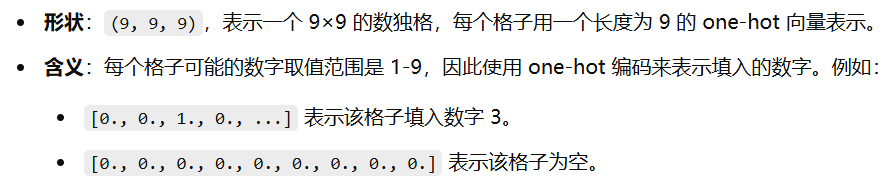

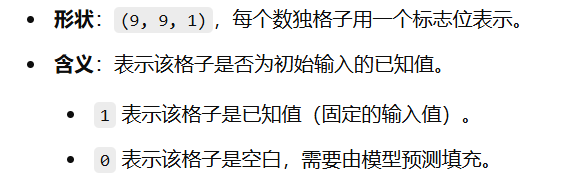

In [40]:
sudoku = SudokuDataset()
print(sudoku.X.shape, sudoku.Y.shape, sudoku.is_input.shape)
print(sudoku.__len__())
# print(sudoku.__getitem__(0))

torch.Size([9000, 9, 9, 9]) torch.Size([9000, 9, 9, 9]) torch.Size([9000, 9, 9, 1])
9000


In [44]:
def load_rrn_dataset(data_dir, split):
    if not osp.exists(data_dir):
        raise ValueError(
            f"Data directory {data_dir} does not exist. Run data/download-rrn.sh to download the dataset."
        )

    split_to_filename = {"train": "train.csv", "val": "valid.csv", "test": "test.csv"}

    filename = osp.join(data_dir, split_to_filename[split])
    df = pd.read_csv(filename, header=None)

    def str2onehot(x):
        x = np.array(list(map(int, x)), dtype="int64")
        y = np.zeros((len(x), 9), dtype="float32")
        idx = np.where(x > 0)[0]
        y[idx, x[idx] - 1] = 1
        return y.reshape((9, 9, 9))

    features = list()
    labels = list()
    for i in range(len(df)):
        inp = df.iloc[i][0]
        out = df.iloc[i][1]
        features.append(str2onehot(inp))
        labels.append(str2onehot(out))

    return torch.tensor(np.array(features)), torch.tensor(np.array(labels))

class HardSudokuDataset:
    """
    HardSudoku Dataset

    用于加载和处理困难数独相关的数据集。

    Attributes:
        X (torch.Tensor): 输入特征，形状为 (N, 9, 9, 9) 的张量，其中 N 是样本数量， 9*9 是数独网格大小， 9 是独热编码的长度。
        Y (torch.Tensor): 对应的标签，形状为 (N, 9, 9, 9) 的张量， 含义同上。
        is_input (torch.Tensor): 表示是否为输入数据的标志张量， 最后的维度 1 取值为 {0,1} ， 表示是否是已知的固定输入 。

    Methods:
        __init__(path='sudoku-rnn/', split="test"):
            初始化数据集，根据路径加载数据， split 参数指定加载哪一部分数据集(train, val, test)。

        __len__():
            返回数据集的样本数量。

        __getitem__(idx):
            根据索引返回对应的样本，包括输入特征、标签和是否为输入数据的标志。
    """
    def __init__(self, path='sudoku-rrn/', split="test"):

        X, Y = load_rrn_dataset(path, split)

        is_input = X.sum(dim=3, keepdim=True).int()

        self.X = X
        self.Y = Y
        self.is_input = is_input

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx], self.is_input[idx]

In [47]:
hardsudoku = HardSudokuDataset()
print(hardsudoku.X.shape, hardsudoku.Y.shape, hardsudoku.is_input.shape)
print(hardsudoku.__len__())
# print(hardsudoku.__getitem__(0))

torch.Size([18000, 9, 9, 9]) torch.Size([18000, 9, 9, 9]) torch.Size([18000, 9, 9, 1])
18000
